# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [56]:
train = pd.read_csv('train (3).csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [36]:
train.describe()
'''Отсюда мы можем увидеть, что средний ClientPeriod составляет 32, а средний MonthlySpending составляет 64'''

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


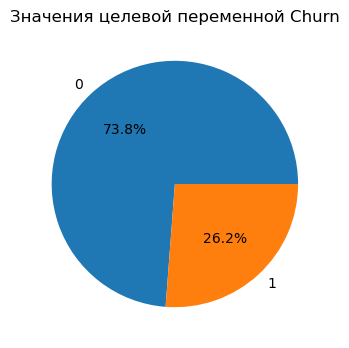

In [33]:
# Анализируем целевую переменную CHurn (категориальный признак)
target_for_pie = train['Churn'].value_counts()
labels = target_for_pie.index
plt.figure(figsize=(6, 4))
plt.pie(target_for_pie.values, labels=labels, autopct='%1.1f%%')
plt.title('Значения целевой переменной Churn')
plt.show()

In [ ]:
#Видно, что классы оказались несбалансированными и только около 1/4 всех клиентов уходит в отток.

In [8]:
#Исследуем данные и разберем численные признаки и их корреляцию с таргетом

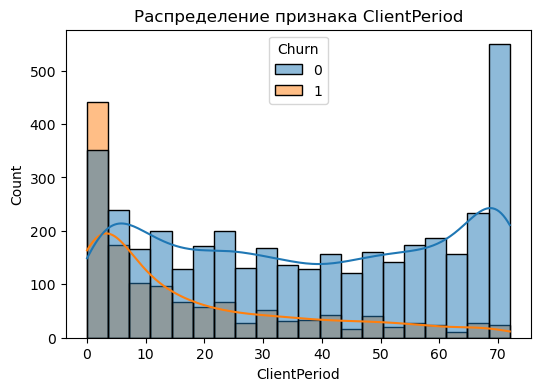

In [29]:
plt.figure(figsize = (6, 4))
sns.histplot(data = train, x = 'ClientPeriod', hue = 'Churn', bins = 20, kde = True)
plt.title('Распределение признака ClientPeriod');   #Мы видим, что больше половины клиентов, чей client period < 5, уходят

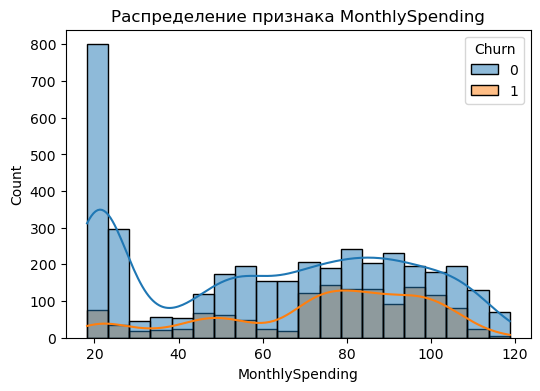

In [88]:
plt.figure(figsize = (6, 4))
sns.histplot(data = train,  x ='MonthlySpending', hue = 'Churn', bins = 20, kde = True)
plt.title('Распределение признака MonthlySpending');

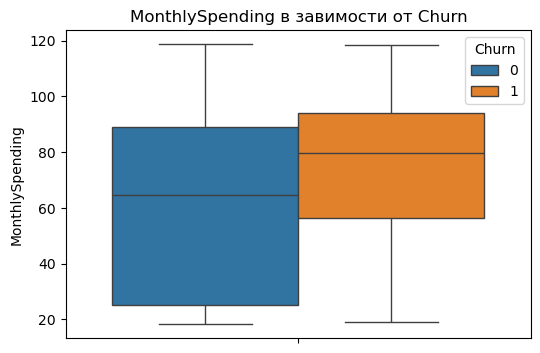

In [22]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = train, y = 'MonthlySpending', hue = 'Churn') #Отсюда видно, что MonthlySpending людей, которые уходят в отток, больше
plt.title('MonthlySpending в завимости от Churn');

In [57]:
train['TotalSpent'].nunique() #Преобразуем TotalSpent в числовую переменную

4978

In [59]:
train[train['TotalSpent'] == ' '].shape #Стоит предположить, что эти клиенты еще не вносили платеж вообще, поэтому имеет смысл заменить на 0, взглянем на них

(9, 20)

In [62]:
train[train['TotalSpent']==' '] #Действительно, clientPeriod = 0, следовательно, заменим на 0

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [68]:
def check(x):
    if x == ' ':
        return 0.0
    return x

In [69]:
train['TotalSpent'] = train['TotalSpent'].apply(lambda x: check(x))

In [73]:
train['TotalSpent'] = train['TotalSpent'].astype('float')

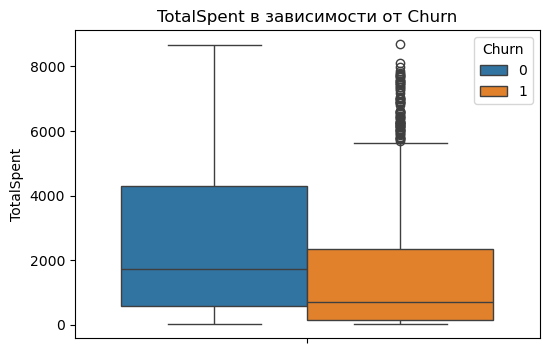

In [127]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = train, y = 'TotalSpent', hue = 'Churn')
plt.title('TotalSpent в зависимости от Churn'); #TotalSpent людей, уходящих в отток, в среднем ниже. Это связано с тем, что это не долговременные клиенты

In [34]:
# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]
#Для удобства перенесем категориальные признаки сюда для построения графиков, всего у нас 16 категориальных признаков

In [35]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [38]:
for i in train.columns:
    if i in cat_cols:
        print(i, train[i].nunique()) #Для понимания количества различных признаков в категориальных признаках

Sex 2
IsSeniorCitizen 2
HasPartner 2
HasChild 2
HasPhoneService 2
HasMultiplePhoneNumbers 3
HasInternetService 3
HasOnlineSecurityService 3
HasOnlineBackup 3
HasDeviceProtection 3
HasTechSupportAccess 3
HasOnlineTV 3
HasMovieSubscription 3
HasContractPhone 3
IsBillingPaperless 2
PaymentMethod 4


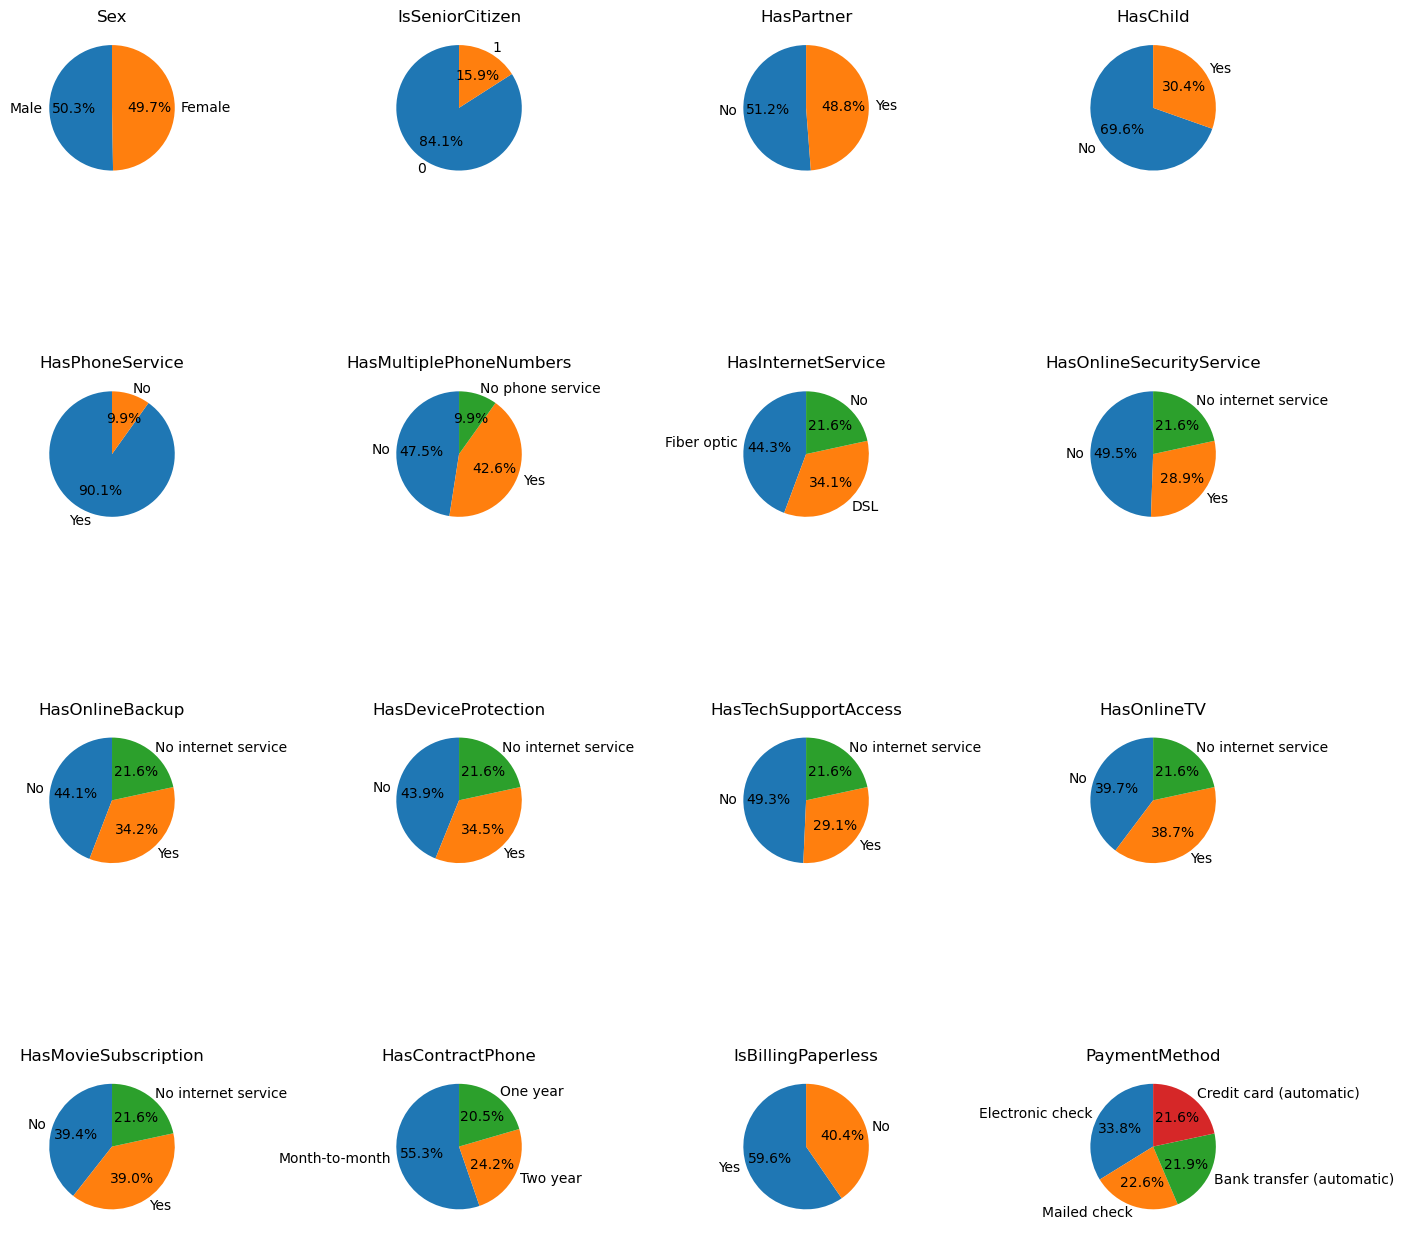

In [48]:
# Создаем сетку под графики (4 строки, 4 столбца, т.к. 16 графиков)
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

# Проходимся по каждому категориальному признаку и строим диаграмму
for idx, col in enumerate(cat_cols):
    ax = axes[idx // 4, idx % 4]
    
    # Получаем значения и их частоту
    values_counts = train[col].value_counts()
    
    # Строим круговую диаграмму
    ax.pie(values_counts, labels=values_counts.index, autopct='%1.1f%%', startangle=90)
    
    # Устанавливаем заголовок
    ax.set_title(col)

# Для красоты ставим tight layout
plt.tight_layout()
plt.show()

In [51]:
'''Некоторые выводы, которые можно отсюда получить:
    *Равномерное распределение мужчин и женщин
    *Преобладание людей среднего и молодого возраста (84.1%)
    *Равномерное распределение людей, имеющих партнера или нет
    *Большинство клиентов не имеют детей (69.6%)
    *Подавляющее большинство людей имеет PhoneService (90.1%)
    *Примерно одинаковое количество людей, имеющих один и несколько MultiplePhoneNumbers
    *Большинство людей имеют интернет-сервис (44.3% + 34.1%)'''

'Некоторые выводы, которые можно отсюда получить:\n    *Равномерное распределение мужчин и женщин\n    *Преобладание людей среднего и молодого возраста (84.1%)\n    *Равномерное распределение людей, имеющих партнера или нет\n    *Большинство клиентов не имеют детей (69.6%)\n    *Подавляющее большинство людей имеет PhoneService (90.1%)\n    *Примерно одинаковое количество людей, имеющих один и несколько MultiplePhoneNumbers\n    *Большинство людей имеют интернет-сервис (44.3% + 34.1%)'

In [ ]:
#Детальнее пройдемся по анализу данных

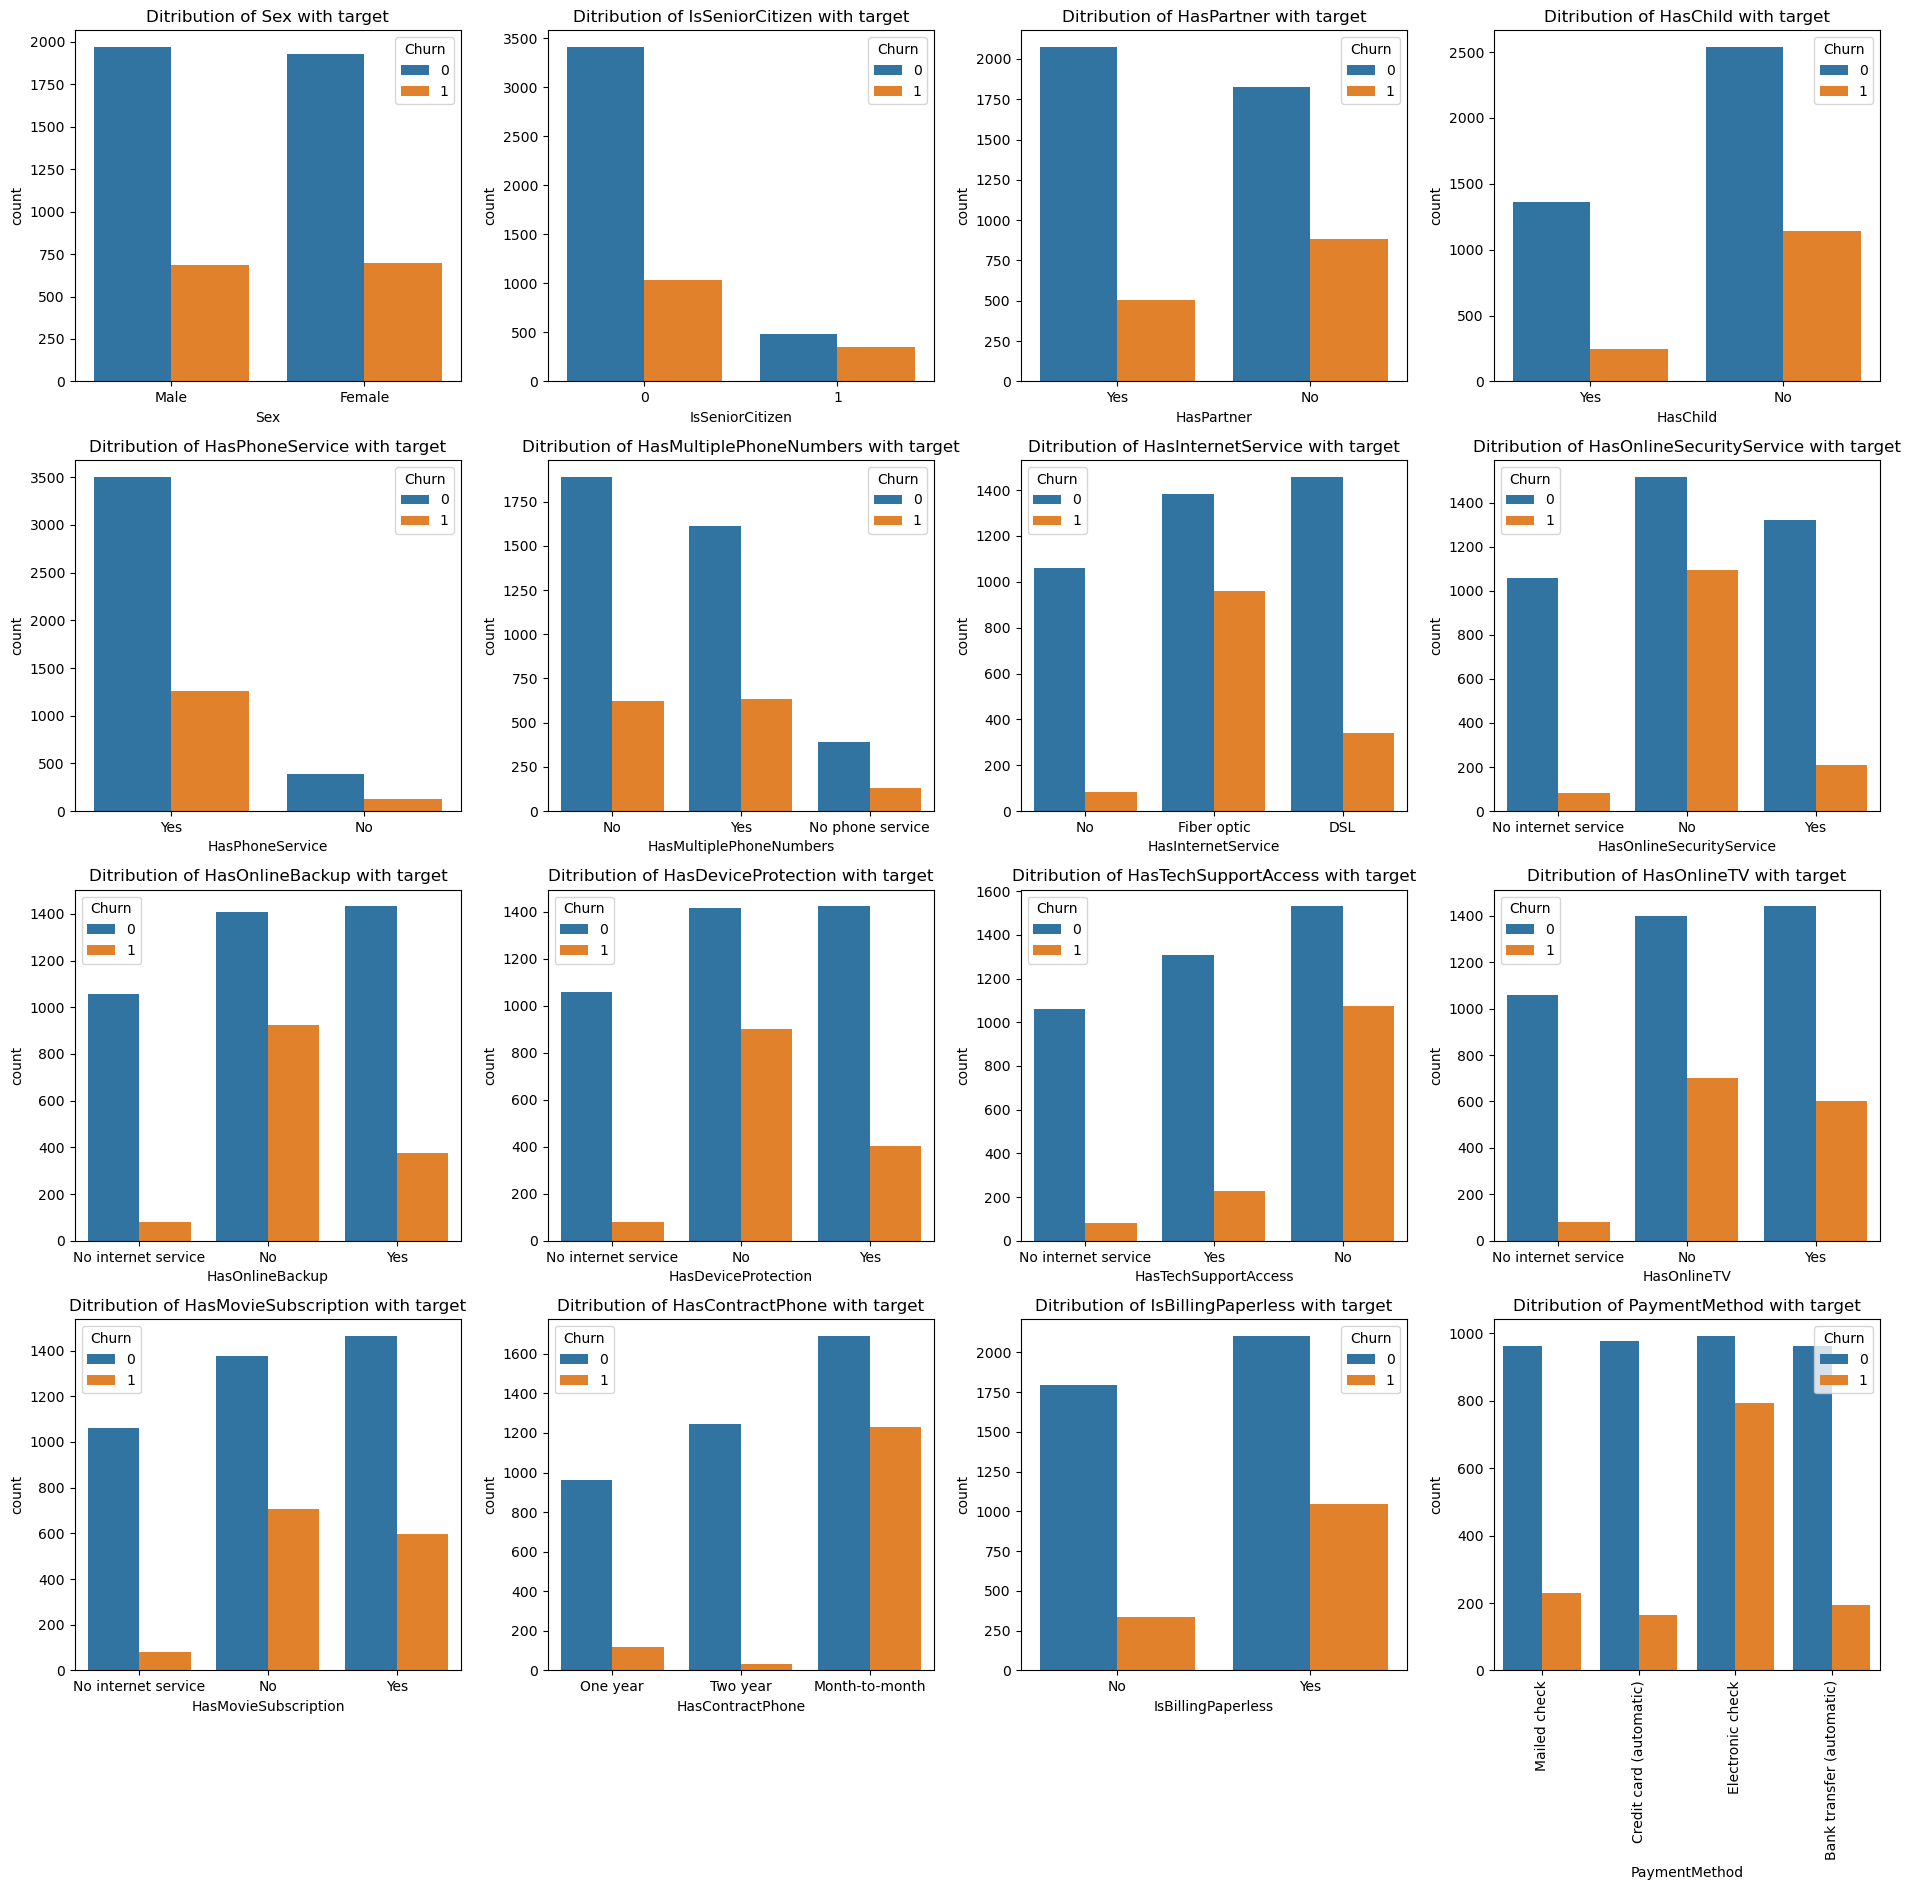

In [65]:
# Создаем сетку под графики (4 строки, 4 столбца, т.к. 16 графиков)
fig, axes = plt.subplots(4, 4, figsize=(19, 19))

# Проходимся по каждому категориальному признаку и строим диаграмму
for idx, col in enumerate(cat_cols):
    ax = axes[idx // 4, idx % 4]
    
    sns.countplot(data = train, x = col, hue = 'Churn', ax = ax)
    # Устанавливаем заголовок
    ax.set_title(f'Ditribution of {col} with target')
    plt.xticks(rotation = 90)

# Для красоты ставим tight layout
plt.tight_layout()
plt.show()


In [66]:
'''Важные выводы, которые можно получить, исходя из этих диаграмм:
    *Уходит в отток примерно одинаковое количество мужчин и женщин
    *Частота ухода пенсионера в отток выше, чем для не пенсионера
    *Те люди, у которых нет партнера, чаще уходят в отток
    *Те люди, у которых нет ребенка, чаще уходят в отток
    *Те люди, у которых нет InternetService, реже уходят в отток
    *Те люди, у которых есть OnlineSecurityService, реже уходят в отток
    *Те люди, у которых есть OnlineBackup, реже уходят в отток
    *Те люди, у которых есть DeviceProtection, реже уходят в отток
    *Те люди, у которых есть TechSupportAccess, реже уходят в отток
    *Те люди, у которых есть OnlineBackup, реже уходят в отток
    *Те люди, у которых есть подписка month-to-month, гораздо чаще уходят в отток
    *Те люди, у которых оплата онлайн (paperless), чаще уходят в отток
    *Те люди, у которых PaymentMethod является Electronic check, чаще уходят в отток
    '''

'Важные выводы, которые можно получить, исходя из этих диаграмм:\n    *Уходит в отток примерно одинаковое количество мужчин и женщин\n    *Частота ухода пенсионера в отток выше, чем для не пенсионера\n    *Те люди, у которых нет партнера, чаще уходят в отток\n    *Те люди, у которых нет ребенка, чаще уходят в отток\n    *Те люди, у которых нет InternetService, реже уходят в отток\n    *Те люди, у которых есть OnlineSecurityService, реже уходят в отток\n    *Те люди, у которых есть OnlineBackup, реже уходят в отток\n    *Те люди, у которых есть DeviceProtection, реже уходят в отток\n    *Те люди, у которых есть TechSupportAccess, реже уходят в отток\n    *Те люди, у которых есть OnlineBackup, реже уходят в отток\n    *Те люди, у которых есть подписка month-to-month, гораздо чаще уходят в отток\n    *Те люди, у которых оплата онлайн (paperless), чаще уходят в отток\n    *Те люди, у которых PaymentMethod является Electronic check, чаще уходят в отток\n    '

In [68]:
#Посмотрим на различные взаимосвязи между переменными

In [67]:
train.head() 

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


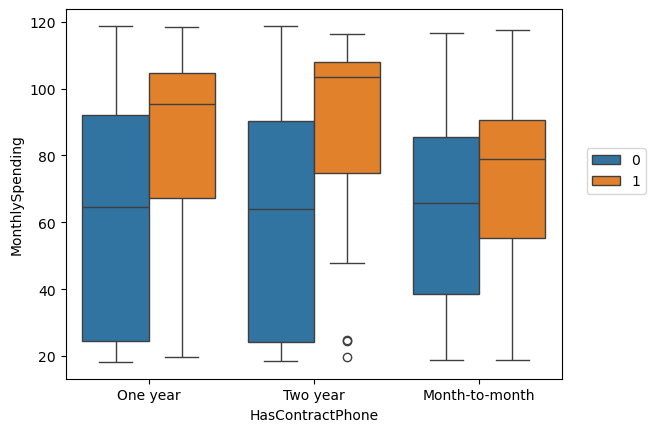

In [75]:
sns.boxplot(data = train, y = 'MonthlySpending', x = 'HasContractPhone', hue = 'Churn')
plt.legend(loc = (1.05, 0.5)); #Отсюда мы видим, что те люди, которые ушли в отток, при любой длительности контракта, тратили больше средств в месяц
#Также важно отметить, что люди с годовй и двухгодовой подписками, тратили в среднем больше, чем month-to-month клиенты

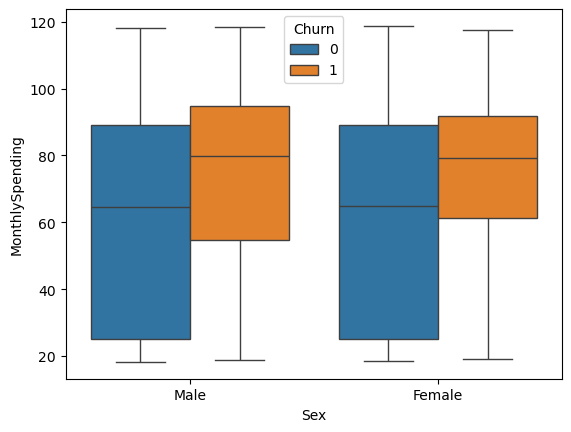

In [82]:
sns.boxplot(data=train, x='Sex', y='MonthlySpending', hue = 'Churn'); #Мужчины и женщины тратили в среднем в месяц одинаковое количество средств на месячные траты

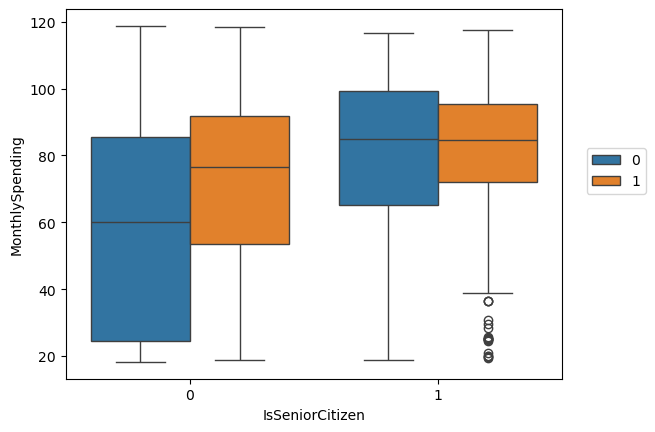

In [87]:
sns.boxplot(data = train, x='IsSeniorCitizen', y='MonthlySpending', hue='Churn')
plt.legend(loc = (1.05, 0.5)); #В среднем пенсионеры тратили больше средств в месяц. Также видны выбросы

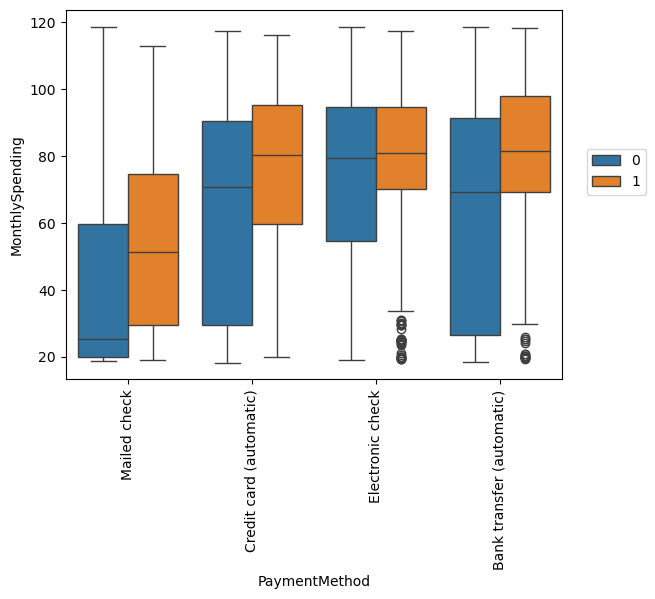

In [91]:
sns.boxplot(data=train, x='PaymentMethod', y='MonthlySpending', hue='Churn')
plt.legend(loc = (1.05, 0.5))
plt.xticks(rotation = 90); #Люди с paymentMethod = mailed check, тратили значительно меньше, чем остальные

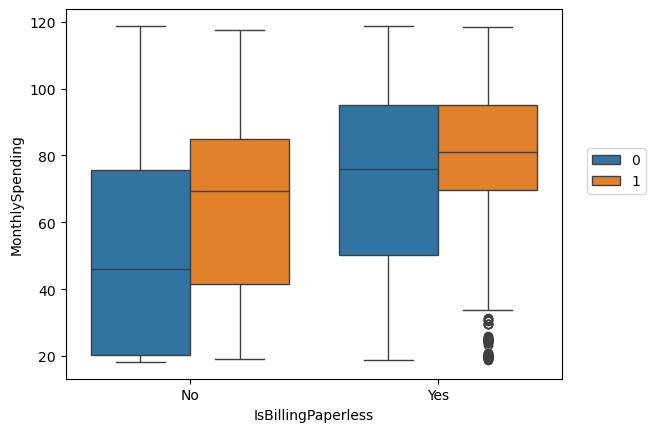

In [95]:
sns.boxplot(data=train, x='IsBillingPaperless', y='MonthlySpending', hue='Churn')
plt.legend(loc = (1.05, 0.5)); #Люди, которые платили онлайн, в среднем тратили больше

<Axes: xlabel='ClientPeriod', ylabel='TotalSpent'>

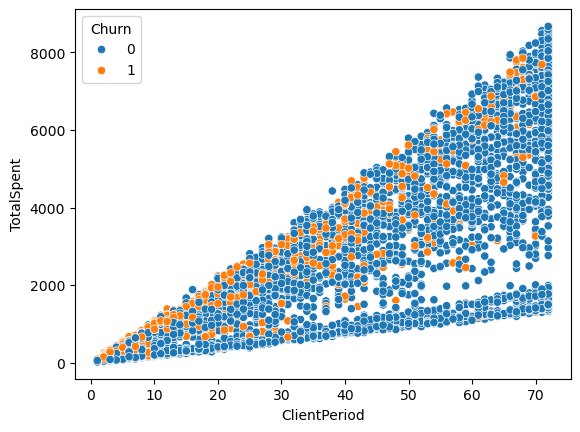

In [129]:
sns.scatterplot(data=train, x='ClientPeriod', y='TotalSpent', hue = 'Churn') #Видно, как totalspent увеличивается со временем ClientPeriod

<Axes: xlabel='MonthlySpending', ylabel='TotalSpent'>

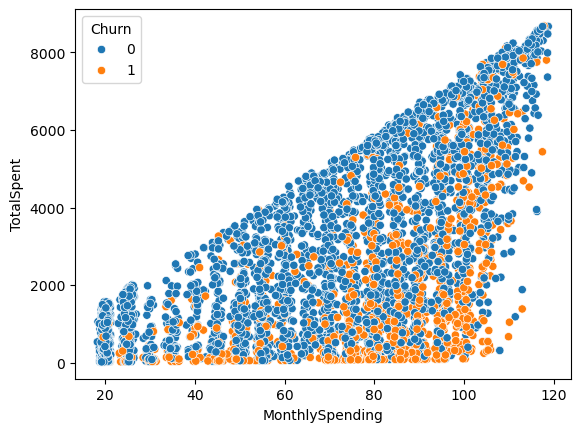

In [132]:
sns.scatterplot(data=train, x='MonthlySpending', y='TotalSpent', hue='Churn') #Чаще уходят в отток те, у которых маленький totalspent и большой monthlySpending

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [96]:
#Займемся обработкой данных

In [100]:
test.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [99]:
train.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [101]:
for i in cat_cols:
    print(train[i].value_counts().sort_values(ascending=False))
    print()

Sex
Male      2655
Female    2627
Name: count, dtype: int64

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

HasChild
No     3676
Yes    1606
Name: count, dtype: int64

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

HasTechSupportAccess
No                     2604
Yes         

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlineTV  

In [ ]:
#Попробуем обнаружить выбросы в численных переменных

In [122]:
train.describe() #Мы видим, что 75 квантиль равен 3807, а максимально значение равно 8648

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461,0.159681,0.262469
std,24.534723,30.177911,2269.014233,0.366345,0.440018
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.500000,401.100000,0.000000,0.000000
50%,29.000000,70.450000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [135]:
train[train['TotalSpent'] > 8000].shape

(57, 20)

<Axes: xlabel='ClientPeriod', ylabel='TotalSpent'>

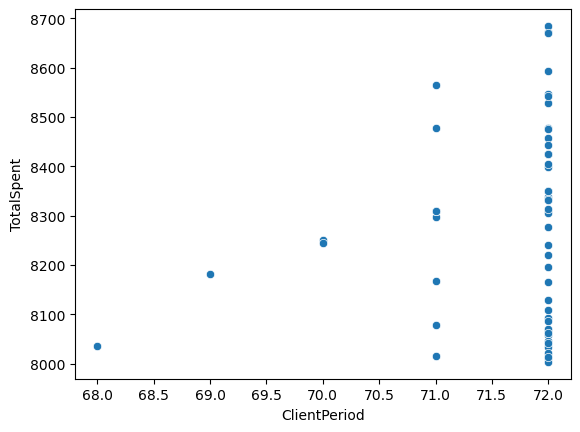

In [138]:
sns.scatterplot(data=train[train['TotalSpent'] > 8000], x='ClientPeriod', y='TotalSpent') #Мы видим, что эти люди имеют большой clientPeriod, поэтому их большие totalSpent являются адекаватными значениями

<Axes: xlabel='ClientPeriod', ylabel='TotalSpent'>

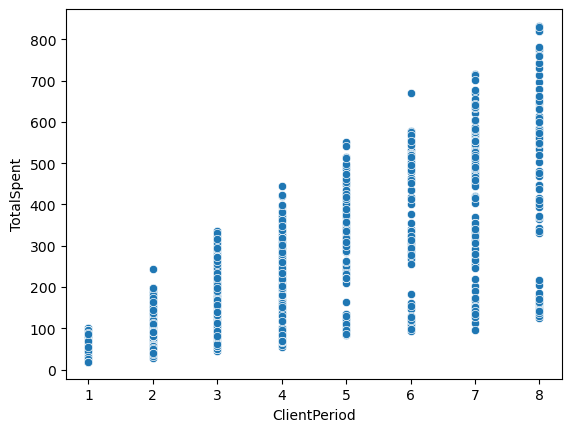

In [140]:
sns.scatterplot(data=train[train['ClientPeriod'] < 9], x='ClientPeriod', y='TotalSpent')

In [139]:
#На мой взгляд, здесь выбросов нет

In [142]:
train.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

Churn              1.000000
MonthlySpending    0.184341
IsSeniorCitizen    0.156502
TotalSpent        -0.201294
ClientPeriod      -0.352613
Name: Churn, dtype: float64

In [143]:
#В будущем попробуем использовать след идею:
#Создадим ShortClient(квантиль 0-25), MiddleClient (квантиль 25-75), LongClient(квантиль 75-100)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as PL
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
import optuna

In [11]:
#Так как классы несбалансирвованны, воспользуемся Oversampling-ом

In [14]:
#Воспользуемся модным способом подбора гиперпараметров

In [77]:
X = train.drop('Churn', axis = 1)
y = train['Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
oversampler = RandomOverSampler(random_state = 42)

LOGISTIC REGRESSION

In [93]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

model_linreg = PL(steps =[('preprocessor',preprocessor),
                         ('oversampler', oversampler),
                         ('classifier', LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001, 1.734],cv=5,scoring='roc_auc',max_iter=1000))])


model_linreg.fit(X_train, y_train)

y_pred_proba = model_linreg.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8262021961378265


In [101]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_linreg.predict_proba(X_test)[:, 1]
submission.to_csv('linreg_submission.csv', index = False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.8262

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

CATBOOSTCLASSIFIER

In [113]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'iterations': trial.suggest_int('iterations', 100, 200),
              'depth': trial.suggest_int('depth', 4, 10),
              'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
              'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
              'border_count': trial.suggest_int('border_count', 1, 255),
              'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
              'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
              'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
              'eval_metric':'AUC',
              'verbose':0}
    catboost_model = CatBoostClassifier(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler',RandomOverSampler(random_state = 42)),
        ('classifier', catboost_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_cat = CatBoostClassifier(**best_params)

model_pipeline_cat = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_cat)  
])
model_pipeline_cat.fit(X_train, y_train)
y_preds = model_pipeline_cat.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna', roc_auc_boosting)

[I 2024-10-14 18:32:51,375] A new study created in memory with name: no-name-55c98f63-f1c2-4087-82f4-64afe435fe2e
[I 2024-10-14 18:32:54,940] Trial 0 finished with value: 0.8157584608420344 and parameters: {'iterations': 123, 'depth': 10, 'learning_rate': 0.191469625975056, 'l2_leaf_reg': 1.4135609900884287, 'border_count': 43, 'random_strength': 3.492110178483569, 'bagging_temperature': 0.060988726276927974, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.8157584608420344.
[I 2024-10-14 18:32:57,294] Trial 1 finished with value: 0.849728361136672 and parameters: {'iterations': 190, 'depth': 8, 'learning_rate': 0.0048171443512826356, 'l2_leaf_reg': 2.0663900511255866, 'border_count': 160, 'random_strength': 8.424687238331337, 'bagging_temperature': 0.266038682766395, 'boosting_type': 'Plain'}. Best is trial 1 with value: 0.849728361136672.
[I 2024-10-14 18:32:59,415] Trial 2 finished with value: 0.8494441464412067 and parameters: {'iterations': 107, 'depth': 9, 'learning_rate'

Best parameters {'iterations': 167, 'depth': 4, 'learning_rate': 0.05320888809942215, 'l2_leaf_reg': 4.087888792406419, 'border_count': 254, 'random_strength': 9.943195665424522, 'bagging_temperature': 0.6059989072457089, 'boosting_type': 'Ordered'}
0:	learn: 0.6695864	total: 10.3ms	remaining: 1.72s
1:	learn: 0.6515670	total: 17.5ms	remaining: 1.44s
2:	learn: 0.6366833	total: 25.7ms	remaining: 1.4s
3:	learn: 0.6252334	total: 32.7ms	remaining: 1.33s
4:	learn: 0.6153706	total: 38.2ms	remaining: 1.24s
5:	learn: 0.6050388	total: 44.4ms	remaining: 1.19s
6:	learn: 0.5951341	total: 49.9ms	remaining: 1.14s
7:	learn: 0.5885543	total: 55.7ms	remaining: 1.11s
8:	learn: 0.5809039	total: 61.1ms	remaining: 1.07s
9:	learn: 0.5708165	total: 66.3ms	remaining: 1.04s
10:	learn: 0.5666420	total: 70.8ms	remaining: 1s
11:	learn: 0.5591156	total: 75.4ms	remaining: 974ms
12:	learn: 0.5543061	total: 79.3ms	remaining: 939ms
13:	learn: 0.5474712	total: 82.9ms	remaining: 906ms
14:	learn: 0.5413739	total: 86.8ms	r

In [109]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_pipeline_cat.predict_proba(X_test)[:, 1]
submission.to_csv('cat_submission.csv', index = False)

KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'n_neighbors': trial.suggest_int('n_neighbors', 1, 40)}
    knn_model = KNN(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler',RandomOverSampler(random_state = 42)),
        ('classifier', knn_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_knn = KNN(**best_params)

model_pipeline_knn = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_knn)  
])
model_pipeline_knn.fit(X_train, y_train)
y_preds = model_pipeline_knn.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna, KNN', roc_auc_boosting)


[I 2024-10-14 18:33:58,314] A new study created in memory with name: no-name-93630624-1f1b-432c-b3c8-4d0650b911d7
[I 2024-10-14 18:33:58,423] Trial 0 finished with value: 0.8201352363635683 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.8201352363635683.
[I 2024-10-14 18:33:58,523] Trial 1 finished with value: 0.787499337571933 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.8201352363635683.
[I 2024-10-14 18:33:58,632] Trial 2 finished with value: 0.8304957248390941 and parameters: {'n_neighbors': 35}. Best is trial 2 with value: 0.8304957248390941.
[I 2024-10-14 18:33:58,740] Trial 3 finished with value: 0.8265890162233397 and parameters: {'n_neighbors': 25}. Best is trial 2 with value: 0.8304957248390941.
[I 2024-10-14 18:33:58,839] Trial 4 finished with value: 0.812975586100357 and parameters: {'n_neighbors': 13}. Best is trial 2 with value: 0.8304957248390941.
[I 2024-10-14 18:33:58,938] Trial 5 finished with value: 0.8201352363635683 and para

Best parameters {'n_neighbors': 40}
ROC_AUC score of model with oversampling and optuna, KNN 0.8069328875795385


In [102]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_pipeline_knn.predict_proba(X_test)[:, 1]
submission.to_csv('knn_submission.csv', index = False)

RANDOM FOREST

In [103]:
from sklearn.ensemble import RandomForestClassifier as RF

In [115]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', X_train.shape[1]]),
              'n_estimators': trial.suggest_int('n_estimators', 50, 200),
              'min_samples_split': trial.suggest_int('min_samples_split', 2, 200),
              'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 200)
              }
    rf_model = RF(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler',RandomOverSampler(random_state = 42)),
        ('classifier', rf_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_rf = RF(**best_params)

model_pipeline_rf = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_rf)  
])
model_pipeline_rf.fit(X_train, y_train)
y_preds = model_pipeline_rf.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna, RF', roc_auc_boosting)

[I 2024-10-14 18:34:05,101] A new study created in memory with name: no-name-e70da7e5-0d30-41d7-8b09-1728ba025490
[I 2024-10-14 18:34:05,481] Trial 0 finished with value: 0.8477402877045236 and parameters: {'max_features': 'log2', 'n_estimators': 189, 'min_samples_split': 192, 'min_samples_leaf': 66}. Best is trial 0 with value: 0.8477402877045236.
[I 2024-10-14 18:34:05,822] Trial 1 finished with value: 0.8495152034684225 and parameters: {'max_features': 'sqrt', 'n_estimators': 148, 'min_samples_split': 7, 'min_samples_leaf': 54}. Best is trial 1 with value: 0.8495152034684225.
[I 2024-10-14 18:34:05,973] Trial 2 finished with value: 0.8486176365013391 and parameters: {'max_features': 'log2', 'n_estimators': 51, 'min_samples_split': 38, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.8495152034684225.
[I 2024-10-14 18:34:06,166] Trial 3 finished with value: 0.8492663509440771 and parameters: {'max_features': 'log2', 'n_estimators': 80, 'min_samples_split': 22, 'min_samples_leaf

Best parameters {'max_features': 19, 'n_estimators': 136, 'min_samples_split': 47, 'min_samples_leaf': 78}
ROC_AUC score of model with oversampling and optuna, RF 0.8214183467090256


In [105]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_pipeline_rf.predict_proba(X_test)[:, 1]
submission.to_csv('rf_submission.csv', index = False)

Попробуем воспользоваться SMOTE вместо RandomOverSampler

CATBOOSTCLASSIFIER + SMOTE

In [143]:
from imblearn.over_sampling import SMOTE

In [167]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'iterations': trial.suggest_int('iterations', 100, 200),
              'depth': trial.suggest_int('depth', 4, 10),
              'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
              'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
              'border_count': trial.suggest_int('border_count', 1, 255),
              'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
              'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
              'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
              'eval_metric':'AUC',
              'verbose':0}
    catboost_model = CatBoostClassifier(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler',SMOTE(random_state = 42)),
        ('classifier', catboost_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_cat = CatBoostClassifier(**best_params)

model_pipeline_cat = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_cat)  
])
model_pipeline_cat.fit(X_train, y_train)
y_preds = model_pipeline_cat.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna', roc_auc_boosting)

[I 2024-10-14 19:28:35,665] A new study created in memory with name: no-name-4a970d87-78b3-4391-b99d-9223bbc461af
[I 2024-10-14 19:28:36,529] Trial 0 finished with value: 0.8419047401373891 and parameters: {'iterations': 126, 'depth': 6, 'learning_rate': 0.04259378757067462, 'l2_leaf_reg': 0.583564509160809, 'border_count': 2, 'random_strength': 8.102458397804114, 'bagging_temperature': 0.5953819124579194, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.8419047401373891.
[I 2024-10-14 19:28:37,750] Trial 1 finished with value: 0.8342165300841615 and parameters: {'iterations': 195, 'depth': 10, 'learning_rate': 0.1627543404659542, 'l2_leaf_reg': 0.7144982820614829, 'border_count': 2, 'random_strength': 0.827941557482459, 'bagging_temperature': 0.742589779907681, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.8419047401373891.
[I 2024-10-14 19:28:38,848] Trial 2 finished with value: 0.8460674273185061 and parameters: {'iterations': 133, 'depth': 4, 'learning_rate':

Best parameters {'iterations': 107, 'depth': 5, 'learning_rate': 0.036412301721704704, 'l2_leaf_reg': 8.71406223366067, 'border_count': 117, 'random_strength': 2.1930868244161834, 'bagging_temperature': 0.8504920455387616, 'boosting_type': 'Plain'}
0:	learn: 0.6768837	total: 6.89ms	remaining: 730ms
1:	learn: 0.6644860	total: 12.5ms	remaining: 657ms
2:	learn: 0.6501618	total: 17.7ms	remaining: 614ms
3:	learn: 0.6373517	total: 24.2ms	remaining: 622ms
4:	learn: 0.6263552	total: 29.8ms	remaining: 608ms
5:	learn: 0.6157008	total: 34.4ms	remaining: 579ms
6:	learn: 0.6049221	total: 40.5ms	remaining: 579ms
7:	learn: 0.5969219	total: 43.9ms	remaining: 543ms
8:	learn: 0.5894625	total: 48.1ms	remaining: 524ms
9:	learn: 0.5810292	total: 51ms	remaining: 495ms
10:	learn: 0.5731782	total: 54.9ms	remaining: 479ms
11:	learn: 0.5658251	total: 58.9ms	remaining: 466ms
12:	learn: 0.5586227	total: 63ms	remaining: 455ms
13:	learn: 0.5526246	total: 66.1ms	remaining: 439ms
14:	learn: 0.5466404	total: 69.5ms	re

In [146]:
#Результат стал немного лучше

In [168]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_pipeline_cat.predict_proba(X_test)[:, 1]
submission.to_csv('catboost_smote_submission.csv', index = False)

Попробуем продвинутый SMOTE - ADASYN

In [147]:
from imblearn.over_sampling import ADASYN

In [150]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'iterations': trial.suggest_int('iterations', 100, 200),
              'depth': trial.suggest_int('depth', 4, 10),
              'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
              'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
              'border_count': trial.suggest_int('border_count', 1, 255),
              'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
              'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
              'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
              'eval_metric':'AUC',
              'verbose':0}
    catboost_model = CatBoostClassifier(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler', ADASYN(random_state = 42)),
        ('classifier', catboost_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_cat = CatBoostClassifier(**best_params)

model_pipeline_cat = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_cat)  
])
model_pipeline_cat.fit(X_train, y_train)
y_preds = model_pipeline_cat.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna', roc_auc_boosting)

[I 2024-10-14 19:14:03,759] A new study created in memory with name: no-name-178a4fbd-a519-4a4e-a33b-58acf483ca92
[I 2024-10-14 19:14:04,788] Trial 0 finished with value: 0.8286527925411704 and parameters: {'iterations': 157, 'depth': 8, 'learning_rate': 0.06319501492136177, 'l2_leaf_reg': 0.41640551760334427, 'border_count': 62, 'random_strength': 4.349915818342865, 'bagging_temperature': 0.6119470642636371, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.8286527925411704.
[I 2024-10-14 19:14:05,736] Trial 1 finished with value: 0.8219246258150968 and parameters: {'iterations': 178, 'depth': 6, 'learning_rate': 0.2524381737478671, 'l2_leaf_reg': 8.103671371315048, 'border_count': 249, 'random_strength': 5.264896988524583, 'bagging_temperature': 0.173263610249215, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.8286527925411704.
[I 2024-10-14 19:14:06,211] Trial 2 finished with value: 0.8477341287968528 and parameters: {'iterations': 136, 'depth': 4, 'learning_rate': 

Best parameters {'iterations': 118, 'depth': 4, 'learning_rate': 0.08766257542598167, 'l2_leaf_reg': 3.8643548735176037, 'border_count': 197, 'random_strength': 1.9530836306897488, 'bagging_temperature': 0.9954168487369848, 'boosting_type': 'Ordered'}
0:	learn: 0.6579240	total: 7.2ms	remaining: 842ms
1:	learn: 0.6302268	total: 13ms	remaining: 753ms
2:	learn: 0.6063815	total: 17.7ms	remaining: 679ms
3:	learn: 0.5825141	total: 22.5ms	remaining: 641ms
4:	learn: 0.5676575	total: 26.6ms	remaining: 602ms
5:	learn: 0.5552775	total: 30.8ms	remaining: 575ms
6:	learn: 0.5460481	total: 35.1ms	remaining: 557ms
7:	learn: 0.5362824	total: 39.5ms	remaining: 544ms
8:	learn: 0.5273443	total: 43.7ms	remaining: 529ms
9:	learn: 0.5205888	total: 47.7ms	remaining: 516ms
10:	learn: 0.5129500	total: 52.4ms	remaining: 510ms
11:	learn: 0.5078785	total: 56.3ms	remaining: 498ms
12:	learn: 0.5039971	total: 60.3ms	remaining: 487ms
13:	learn: 0.4995865	total: 64ms	remaining: 475ms
14:	learn: 0.4956474	total: 68ms	re

In [151]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_pipeline_cat.predict_proba(X_test)[:, 1]
submission.to_csv('catboost_adasyn_submission.csv', index = False)

In [152]:
#Модель показала результат, который немного хуже

Последнее, что попробум, - это KMeans-SMOTE

In [160]:
from imblearn.over_sampling import KMeansSMOTE

In [161]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'iterations': trial.suggest_int('iterations', 100, 200),
              'depth': trial.suggest_int('depth', 4, 10),
              'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
              'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
              'border_count': trial.suggest_int('border_count', 1, 255),
              'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
              'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
              'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
              'eval_metric':'AUC',
              'verbose':0}
    catboost_model = CatBoostClassifier(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler', KMeansSMOTE(random_state = 42)),
        ('classifier', catboost_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_cat = CatBoostClassifier(**best_params)

model_pipeline_cat = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_cat)  
])
model_pipeline_cat.fit(X_train, y_train)
y_preds = model_pipeline_cat.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna', roc_auc_boosting)

[I 2024-10-14 19:21:43,909] A new study created in memory with name: no-name-472868b7-ab93-45b3-b8f9-9d30f0eb5fc2
[I 2024-10-14 19:21:45,903] Trial 0 finished with value: 0.8393475026465372 and parameters: {'iterations': 138, 'depth': 5, 'learning_rate': 0.2816555352730446, 'l2_leaf_reg': 4.480971832967359, 'border_count': 117, 'random_strength': 1.5719935815910941, 'bagging_temperature': 0.2667671296952505, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 0.8393475026465372.
[I 2024-10-14 19:22:05,131] Trial 1 finished with value: 0.8416966591374518 and parameters: {'iterations': 149, 'depth': 10, 'learning_rate': 0.11741003189990538, 'l2_leaf_reg': 3.006429460301868, 'border_count': 209, 'random_strength': 0.0638319428273577, 'bagging_temperature': 0.34353234657288156, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.8416966591374518.
[I 2024-10-14 19:22:07,877] Trial 2 finished with value: 0.839267375110432 and parameters: {'iterations': 184, 'depth': 6, 'learning_

Best parameters {'iterations': 133, 'depth': 5, 'learning_rate': 0.052888647527045626, 'l2_leaf_reg': 9.931100511536453, 'border_count': 119, 'random_strength': 0.2273197758686949, 'bagging_temperature': 0.8530707308421271, 'boosting_type': 'Plain'}
0:	learn: 0.6677228	total: 7.99ms	remaining: 1.05s
1:	learn: 0.6454978	total: 15ms	remaining: 983ms
2:	learn: 0.6258292	total: 21.4ms	remaining: 929ms
3:	learn: 0.6095028	total: 26.5ms	remaining: 854ms
4:	learn: 0.5942629	total: 31.5ms	remaining: 807ms
5:	learn: 0.5794318	total: 37.1ms	remaining: 785ms
6:	learn: 0.5681558	total: 42.2ms	remaining: 760ms
7:	learn: 0.5579774	total: 47ms	remaining: 735ms
8:	learn: 0.5484340	total: 51.2ms	remaining: 705ms
9:	learn: 0.5389756	total: 54.7ms	remaining: 673ms
10:	learn: 0.5313829	total: 57.2ms	remaining: 634ms
11:	learn: 0.5245083	total: 60.8ms	remaining: 613ms
12:	learn: 0.5185119	total: 64.4ms	remaining: 595ms
13:	learn: 0.5130251	total: 67.8ms	remaining: 577ms
14:	learn: 0.5078149	total: 71.2ms	r

In [162]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = model_pipeline_cat.predict_proba(X_test)[:, 1]
submission.to_csv('catboost_kmeans_submission.csv', index = False)

In [163]:
#Модель опять оказалась немного хуже

In [169]:
#Обучим лучшую модель и увидим ее параметры

In [170]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

def objective(trial):
    params = {'iterations': trial.suggest_int('iterations', 100, 200),
              'depth': trial.suggest_int('depth', 4, 10),
              'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
              'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
              'border_count': trial.suggest_int('border_count', 1, 255),
              'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
              'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
              'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
              'eval_metric':'AUC',
              'verbose':0}
    catboost_model = CatBoostClassifier(**params)
    model_pipeline = PL(steps = [
        ('preprocessor', preprocessor),
        ('oversampler',SMOTE(random_state = 42)),
        ('classifier', catboost_model)  
    ])
    scores = cross_val_score(model_pipeline, X_train, y_train, cv = 3, scoring = 'roc_auc', n_jobs = -1)
    return scores.mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30)

print('Best parameters', study.best_params)
best_params = study.best_params
best_model_cat = CatBoostClassifier(**best_params)

model_pipeline_cat = PL(steps = [
    ('preprocessor', preprocessor),
    ('oversampler',RandomOverSampler(random_state = 42)),
    ('classifier', best_model_cat)  
])
model_pipeline_cat.fit(X_train, y_train)
y_preds = model_pipeline_cat.predict_proba(X_valid)[:, 1]
roc_auc_boosting = roc_auc_score(y_valid, y_preds)
print('ROC_AUC score of model with oversampling and optuna', roc_auc_boosting)

[I 2024-10-14 19:31:23,203] A new study created in memory with name: no-name-021c7284-16c2-40cc-9da1-b1c375ead063
[I 2024-10-14 19:31:23,983] Trial 0 finished with value: 0.8421757165976391 and parameters: {'iterations': 194, 'depth': 7, 'learning_rate': 0.002812018075005154, 'l2_leaf_reg': 1.7079422998058746, 'border_count': 33, 'random_strength': 1.5452528389694775, 'bagging_temperature': 0.10918017749370457, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.8421757165976391.
[I 2024-10-14 19:31:27,428] Trial 1 finished with value: 0.8441028536070531 and parameters: {'iterations': 109, 'depth': 7, 'learning_rate': 0.049467233311712176, 'l2_leaf_reg': 1.2775521704482877, 'border_count': 129, 'random_strength': 6.052933628873564, 'bagging_temperature': 0.41458562696872403, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.8441028536070531.
[I 2024-10-14 19:31:30,760] Trial 2 finished with value: 0.8470966583843205 and parameters: {'iterations': 190, 'depth': 6, 'learnin

Best parameters {'iterations': 195, 'depth': 4, 'learning_rate': 0.057188907739785466, 'l2_leaf_reg': 6.174425215649581, 'border_count': 230, 'random_strength': 1.0034814419839406, 'bagging_temperature': 0.023430236864335596, 'boosting_type': 'Ordered'}
0:	learn: 0.6671869	total: 11.5ms	remaining: 2.23s
1:	learn: 0.6455512	total: 19.8ms	remaining: 1.91s
2:	learn: 0.6273123	total: 27.3ms	remaining: 1.75s
3:	learn: 0.6116466	total: 35.7ms	remaining: 1.7s
4:	learn: 0.5968640	total: 43.1ms	remaining: 1.64s
5:	learn: 0.5847365	total: 49ms	remaining: 1.54s
6:	learn: 0.5741531	total: 55.4ms	remaining: 1.49s
7:	learn: 0.5639910	total: 63ms	remaining: 1.47s
8:	learn: 0.5547987	total: 69.8ms	remaining: 1.44s
9:	learn: 0.5462601	total: 75.4ms	remaining: 1.4s
10:	learn: 0.5382159	total: 80.6ms	remaining: 1.35s
11:	learn: 0.5314114	total: 85.3ms	remaining: 1.3s
12:	learn: 0.5246645	total: 89.5ms	remaining: 1.25s
13:	learn: 0.5198480	total: 93.1ms	remaining: 1.2s
14:	learn: 0.5148869	total: 97.4ms	r

Лучшая модель - CatBoostClassifier (oversampling = SMOTE) с параметрами:
 {'iterations': 195, 'depth': 4, 'learning_rate': 0.057188907739785466, 'l2_leaf_reg': 6.174425215649581, 'border_count': 230, 'random_strength': 1.0034814419839406, 'bagging_temperature': 0.023430236864335596, 'boosting_type': 'Ordered'}

AUC модели - 0.8279384194826424

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [171]:
best_model = model_pipeline_cat

In [173]:
X_test = pd.read_csv('test (1).csv')
submission = pd.read_csv('submission (1).csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(lambda x: check(x))
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('catboost_smote_submission.csv', index = False)

Лучшее решение отправьте в Stepik.